## XML >> COCO JSON Pipeline Prototype

## Plotting Coordinates from XML

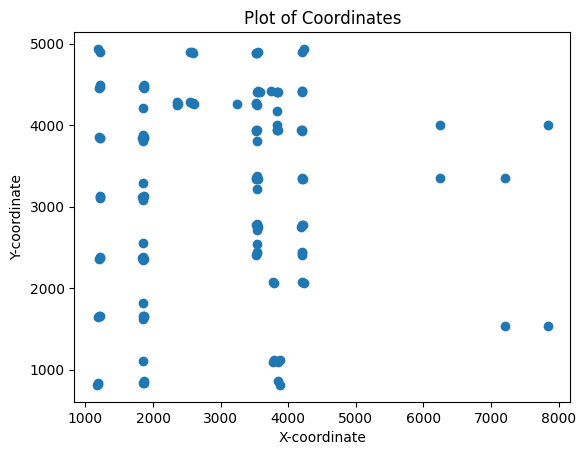

In [1]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Read XML data from file
file_path = '/Users/jinuaugustine/Documents/AI-Hub/Plexxis/Dataset/ListOfRTODump/BD-00165/Page-Floors 1-3/markups.xml'
with open(file_path, 'r') as file:
    xml_data = file.read()

# Parse the XML
root = ET.fromstring(xml_data)

# Extract coordinates
coordinates = []
for obj in root.findall('.//object'):
    coord = obj.get('coordinates')
    if coord:
        coords = coord.split(';')
        for c in coords:
            if c:
                x, y = map(float, c.split(','))
                coordinates.append((x, y))

# Plot the coordinates
x_values = [x for x, y in coordinates]
y_values = [y for x, y in coordinates]

plt.scatter(x_values, y_values)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Plot of Coordinates')
plt.show()


## Converting XML Coordinates to Polygons

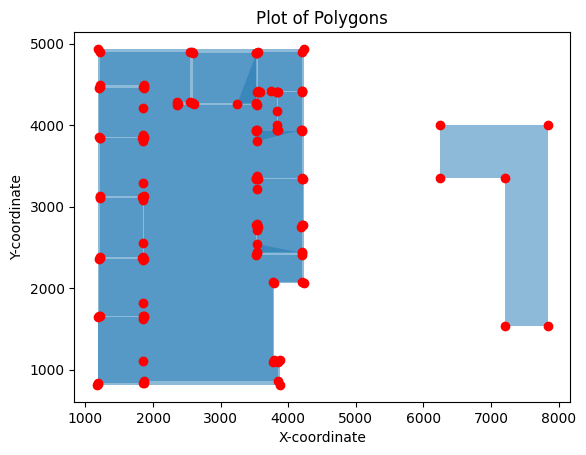

In [2]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Read XML data from file
file_path = '/Users/jinuaugustine/Documents/AI-Hub/Plexxis/Dataset/ListOfRTODump/BD-00165/Page-Floors 1-3/markups.xml'
with open(file_path, 'r') as file:
    xml_data = file.read()

# Parse the XML
root = ET.fromstring(xml_data)

# Extract polygons
polygons = []
for obj in root.findall('.//object'):
    coord = obj.get('coordinates')
    if coord:
        coords = coord.split(';')
        polygon_coords = []
        for c in coords:
            if c:
                x, y = map(float, c.split(','))
                polygon_coords.append((x, y))
        if polygon_coords:
            polygons.append(polygon_coords)

# Plot the polygons
fig, ax = plt.subplots()
for polygon in polygons:
    patch = Polygon(polygon, closed=True, alpha=0.5)
    ax.add_patch(patch)

# Plot the coordinates
x_values = [x for polygon in polygons for x, _ in polygon]
y_values = [y for polygon in polygons for _, y in polygon]
plt.scatter(x_values, y_values, color='red', marker='o')

ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_title('Plot of Polygons')

# Save the plot as a vector image with transparent background
save_path = '/Users/jinuaugustine/Documents/AI-Hub/Plexxis/Dataset/ListOfRTODump/BD-00165/Page-Floors 1-3/polygons.svg'
plt.savefig(save_path, format='svg', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()


## Superimposing the polygons on the image (Without manually adjusting scaling)

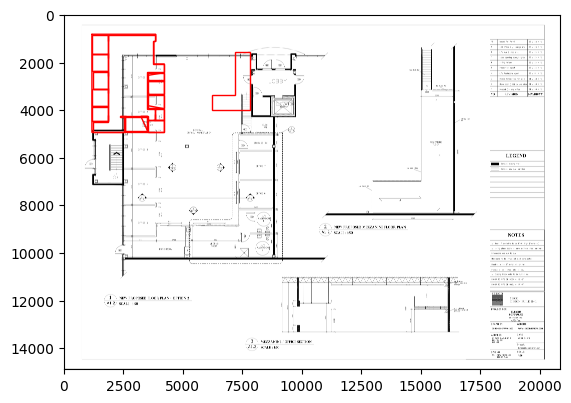

In [3]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image

# Read XML data from file
file_path = '/Users/jinuaugustine/Documents/AI-Hub/Plexxis/Dataset/ListOfRTODump/BD-00165/Page-Floors 1-3/markups.xml'
with open(file_path, 'r') as file:
    xml_data = file.read()

# Set the maximum number of pixels
Image.MAX_IMAGE_PIXELS = None

# Parse the XML
root = ET.fromstring(xml_data)

# Extract polygons
polygons = []
for obj in root.findall('.//object'):
    coord = obj.get('coordinates')
    if coord:
        coords = coord.split(';')
        polygon_coords = []
        for c in coords:
            if c:
                x, y = map(float, c.split(','))
                polygon_coords.append((x, y))
        if polygon_coords:
            polygons.append(polygon_coords)

# Load the image using PIL
image_path = '/Users/jinuaugustine/Downloads/page_page-0001.jpg'
image = Image.open(image_path)

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Plot the polygons
scaling_factor = 1  # Not Scaling
for polygon in polygons:
    scaled_polygon = [(x * scaling_factor, y * scaling_factor) for x, y in polygon]
    poly_patch = Polygon(scaled_polygon, closed=True, fill=None, edgecolor='red')
    ax.add_patch(poly_patch)

# Set the aspect ratio to 'equal' and adjust the limits
ax.set_aspect('equal')
ax.set_xlim(0, image.width)
ax.set_ylim(image.height, 0)

# Show the plot
plt.show()


## Superimposing the polygons on the image (After manually adjusting scaling)

In [46]:
import fitz  # PyMuPDF
import io
from PIL import Image

def convert_pdf_to_image(pdf_path, output_path, page_number=0, dpi=72):
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)
    
    # Load the specified page
    page = pdf_document.load_page(page_number)
    
    # Calculate the size of the image at the given DPI
    size = page.rect
    width, height = size.width, size.height
    zoom_factor = dpi / 72  
    matrix = fitz.Matrix(zoom_factor, zoom_factor)
    
    # Render the page to an image (pixmap)
    pixmap = page.get_pixmap(matrix=matrix)
    
    # Convert the pixmap to a PIL image
    image = Image.frombytes("RGB", [pixmap.width, pixmap.height], pixmap.samples)
    
    # Save the image
    image.save(output_path, "PNG")
    
    # Close the PDF document
    pdf_document.close()

# Paths to the PDF file and output image
pdf_path = '/Users/jinuaugustine/Documents/AI-Hub/Plexxis/Dataset/ListOfRTODump/BD-00127/4/page.pdf'
image_output_path = '/Users/jinuaugustine/Documents/AI-Hub/Plexxis/Dataset/ListOfRTODump/BD-00127/4/image.png'

# Call the function
convert_pdf_to_image(pdf_path, image_output_path)


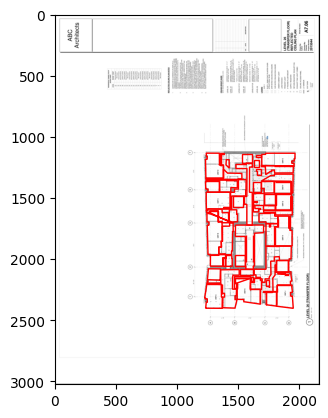

In [48]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
import warnings
import re

# Set the maximum number of pixels
Image.MAX_IMAGE_PIXELS = None

# Read XML data from file
file_path = '/Users/jinuaugustine/Documents/AI-Hub/Plexxis/Dataset/ListOfRTODump/BD-00127/4/markups.xml'
with open(file_path, 'r') as file:
    xml_data = file.read()

# Parse the XML
root = ET.fromstring(xml_data)

# Regular expression pattern for a valid coordinate (float or integer)
valid_coord_pattern = re.compile(r'^-?\d+(\.\d+)?$')

# Extract polygons
polygons = []
for obj in root.findall('.//object'):
    coord = obj.get('coordinates')
    if coord:
        coords = coord.split(';')
        polygon_coords = []
        for c in coords:
            if c:
                parts = c.split(',')
                if all(valid_coord_pattern.match(part) for part in parts):
                    x, y = map(float, parts)
                    polygon_coords.append((x, y))
        if polygon_coords:
            polygons.append(polygon_coords)

# Load the image using PIL
image_path = '/Users/jinuaugustine/Documents/AI-Hub/Plexxis/Dataset/ListOfRTODump/BD-00127/4/image.png'
image = Image.open(image_path)

# Convert the image to RGB if it's not already
if image.mode != 'RGB':
    image = image.convert('RGB')

# Get the image dimensions
img_width, img_height = image.size

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Plot the polygons
scaling_factor = 1  # Scaling manually to fit the image
for polygon in polygons:
    scaled_polygon = [(x * scaling_factor, y * scaling_factor) for x, y in polygon]
    poly_patch = Polygon(scaled_polygon, closed=True, fill=None, edgecolor='red')
    ax.add_patch(poly_patch)

# Set the aspect ratio to 'equal' and adjust the limits
ax.set_aspect('equal')
ax.set_xlim(0, img_width)
ax.set_ylim(img_height, 0)

# Show the plot
plt.show()


## Converting the XML Polygon Coordinates to COCO JSON format to use for Semantic Segmentation

In [47]:
import json
import xml.etree.ElementTree as ET

# Read XML data from file
file_path = '/Users/jinuaugustine/Documents/AI-Hub/Plexxis/Dataset/ListOfRTODump/BD-00127/2/markups.xml'
with open(file_path, 'r') as file:
    xml_data = file.read()

# Parse the XML
root = ET.fromstring(xml_data)

# Create LabelMe JSON structure
labelme_data = {
    "version": "4.5.6",
    "flags": {},
    "shapes": [],
    "imagePath": "/Users/jinuaugustine/Documents/AI-Hub/Plexxis/Dataset/ListOfRTODump/BD-00127/2/page.pdf",  # Modify the image path as needed
    "imageData": None,
    "imageHeight": 29767,  # Update with the actual image height
    "imageWidth": 41667,  # Update with the actual image width  # Update with the actual image width
}

# Scaling factor for increasing polygon size
scaling_factor = 1

# Extract polygons
for obj in root.findall('.//object'):
    coord = obj.get('coordinates')
    if coord:
        coords = coord.split(';')
        polygon_coords = []
        for c in coords:
            if c:
                x, y = map(float, c.split(','))
                # Increase the size of the polygon by applying scaling factor
                x_scaled = x * scaling_factor
                y_scaled = y * scaling_factor
                polygon_coords.append([x_scaled, y_scaled])
        if polygon_coords:
            # Add shape entry
            shape_entry = {
                "label": "room",
                "points": polygon_coords,
                "group_id": None,
                "shape_type": "polygon",
                "flags": {}
            }
            labelme_data["shapes"].append(shape_entry)

# Save LabelMe JSON file
labelme_file_path = '/Users/jinuaugustine/Documents/AI-Hub/Plexxis/Dataset/ListOfRTODump/BD-00127/2/annotations.json'
with open(labelme_file_path, 'w') as file:
    json.dump(labelme_data, file)

print(f"Annotation file saved: {labelme_file_path}")


Annotation file saved: /Users/jinuaugustine/Documents/AI-Hub/Plexxis/Dataset/ListOfRTODump/BD-00127/2/annotations.json
